In [1]:
library(caret)
library(glmnet)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [2]:
coin_data <- read.csv("../imp_coin.csv")[-c(1,2,4,5,6,8)]
coin_data_test <-read.csv("../imp_coin_test.csv")[-c(1,2,4,5,6,8)]

# Functions

In [3]:
lasso_model <- function(x, y) {
  lambdas_to_try <- 10^seq(-3, 10, length.out = 100)
  set.seed(1) 
  # cv.lasso <- cv.glmnet(x, y, alpha = 1, family="gaussian")
  cv.lasso <- cv.glmnet(x, y, alpha = 1, lambda = lambdas_to_try, nfolds = 10)
  # plot(cv.lasso)
  cv.lasso$lambda.min
  cv.lasso$lambda.1se
  coef(cv.lasso, cv.lasso$lambda.min)
  coef(cv.lasso, cv.lasso$lambda.1se)
  # Fit the final model on the training data
  set.seed(1)
  model <- glmnet(x, y, alpha = 1, family = "gaussian", lambda = cv.lasso$lambda.min)
  
  # print(coef(model))
  return(model)
}

predict_model <- function(model, data_to_predict, real_data, label) {
  a  = predict(model, newx = data_to_predict)
  plot.ts(a, sub = label)
  lines(real_data$btc_price,col="green")
# print(mean(a), mean(real_data$btc_price))
}

# Training

Split the data into training and test set

Training 70%, Test 30%, day by day

In [4]:
set.seed(1)
training.samples <- createDataPartition(coin_data$btc_price, p = 0.7, list = FALSE)
train.data  <- coin_data[training.samples, ]
test.data <- coin_data[-training.samples, ]

x <- model.matrix(btc_price~., train.data)[,-1]
y <- as.double(train.data$btc_price)
x.test <- model.matrix(btc_price ~., test.data)[,-1]

Testing on new 20 days

In [5]:
test_last_20 <- model.matrix(btc_price ~., coin_data_test)[,-1]

predict on the 30% of the data

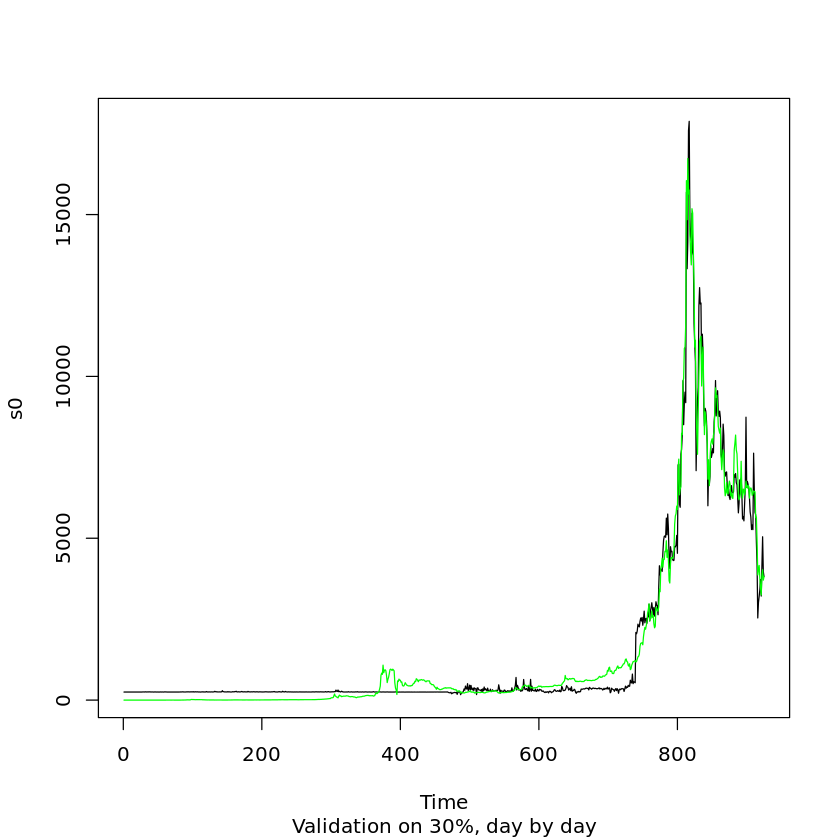

In [6]:
predict_model(lasso_model(x, y) ,x.test, test.data, 'Validation on 30%, day by day')

predict on the 30% of the data delay one day

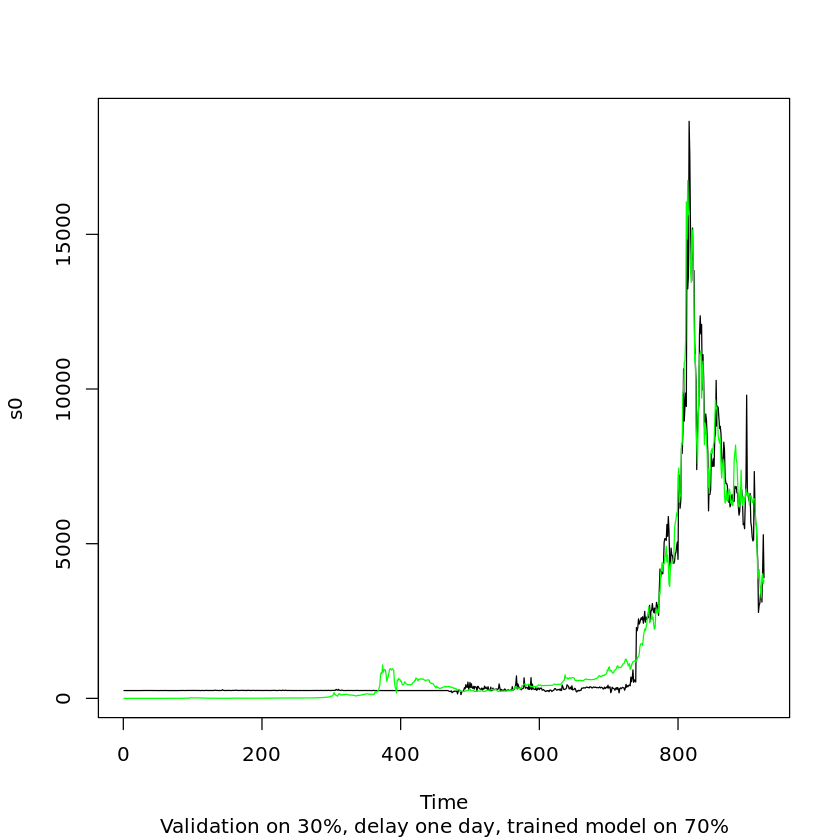

In [7]:
predict_model(lasso_model(head(x,-1), tail(y,-1)),head(x.test, -1), tail(test.data, -1), 'Validation on 30%, delay one day, trained model on 70%')

predict on the last 20 day of the data day by day

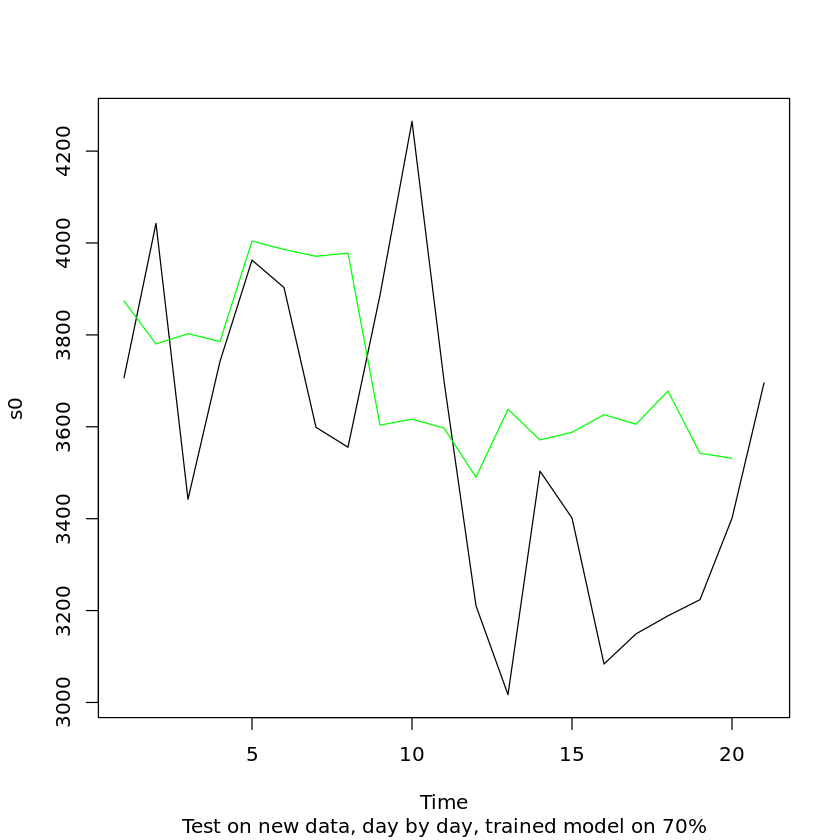

In [8]:
predict_model(lasso_model(x, y), test_last_20, tail(coin_data_test[1], -1), 'Test on new data, day by day, trained model on 70%')

predict on the last 20 day of the data delay one day

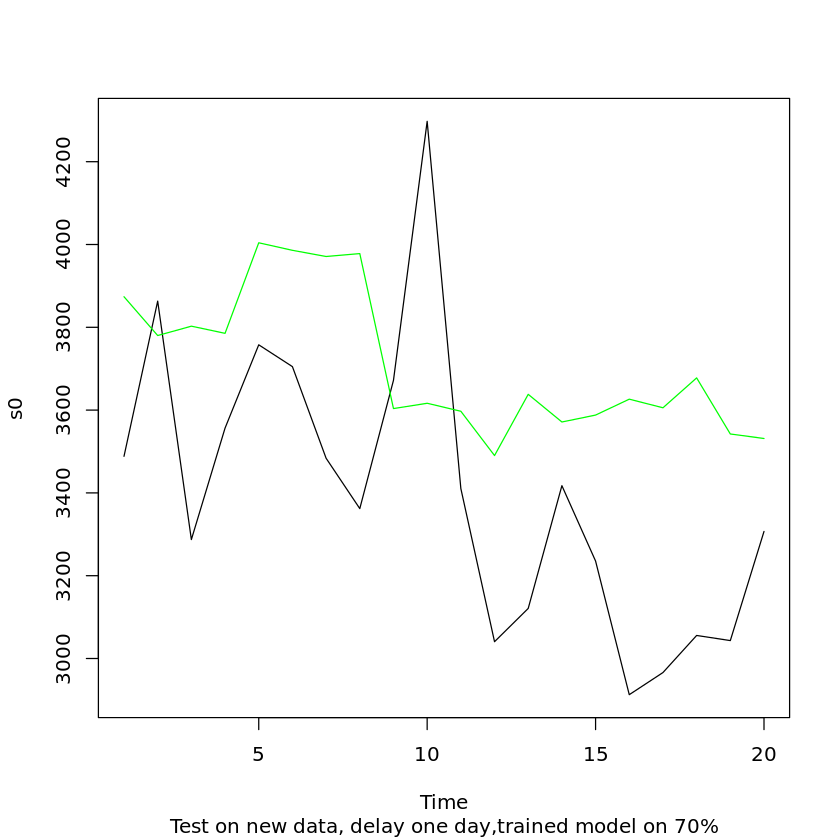

In [9]:
predict_model(lasso_model(head(x,-1), tail(y,-1)),head(test_last_20, -1), tail(coin_data_test[1], -1), 'Test on new data, delay one day,trained model on 70%')

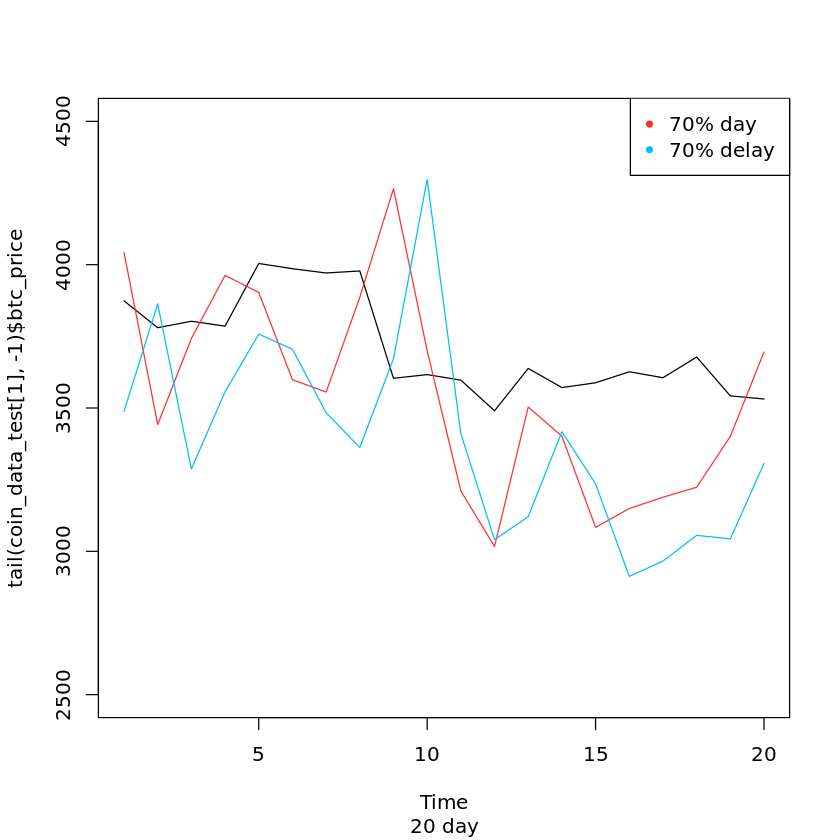

In [10]:
a  = predict(lasso_model(x, y), newx = test_last_20)
b  = predict(lasso_model(head(x,-1), tail(y,-1)), newx = head(test_last_20, -1))

plot.ts(tail(coin_data_test[1], -1)$btc_price, sub = '20 day', ylim=c(2500,4500))
lines(tail(a, -1),col='firebrick1')
lines(b,col='deepskyblue')
legend("topright", legend=c("70% day", "70% delay"), pch=20, col=c("firebrick1", "deepskyblue"))

# bitfinex

In [11]:
bitfinex_raw_data <- read.csv("../bitfinex_coin.csv")[-c(1, 2, 4, 5, 6)]
bitfinex_data <- head(bitfinex_raw_data, 2524)
bitfinex_data_test <-tail(bitfinex_raw_data, -2524)
test_last_20 <- model.matrix(btc_price ~., bitfinex_data_test)[,-1]

set.seed(101)
training.samples <- createDataPartition(bitfinex_data$btc_price, p = 0.7, list = FALSE)
train.data  <- bitfinex_data[training.samples, ]
test.data <- bitfinex_data[-training.samples, ]

x <- model.matrix(btc_price~., train.data)[,-1]
y <- as.double(train.data$btc_price)
x.test <- model.matrix(btc_price ~., test.data)[,-1]

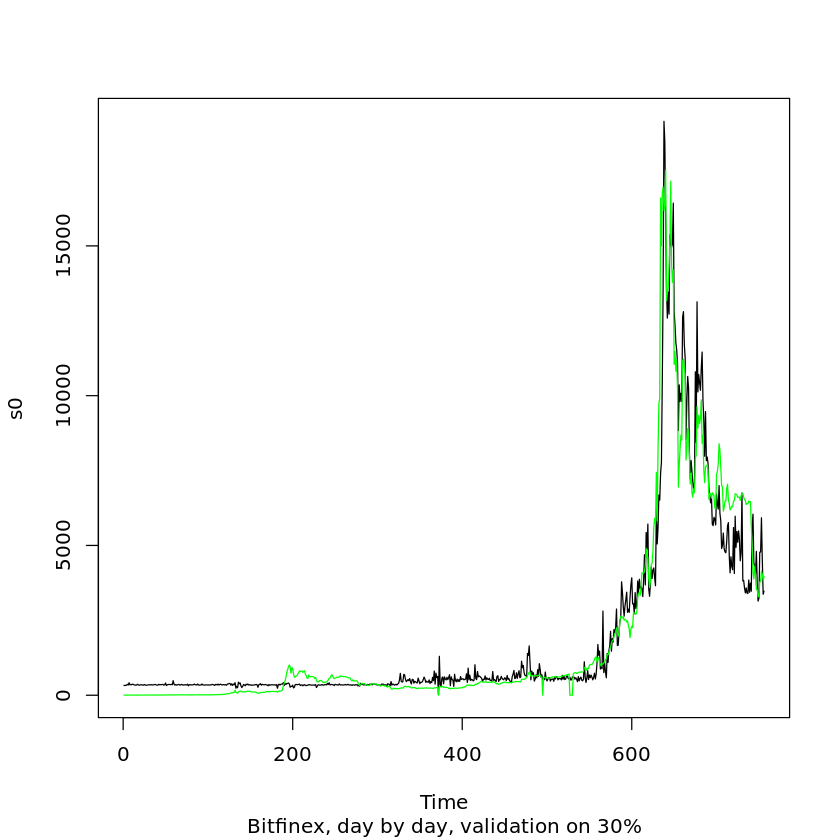

In [12]:
predict_model(lasso_model(x, y) ,x.test, test.data, 'Bitfinex, day by day, validation on 30%')

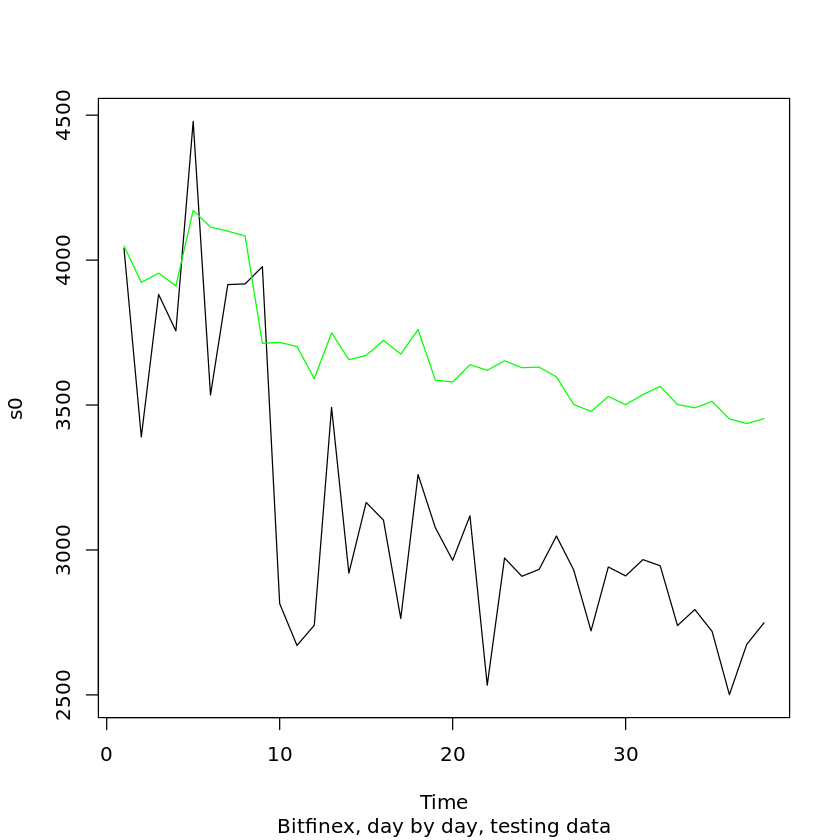

In [13]:
predict_model(lasso_model(x, y), test_last_20, bitfinex_data_test[1], 'Bitfinex, day by day, testing data')

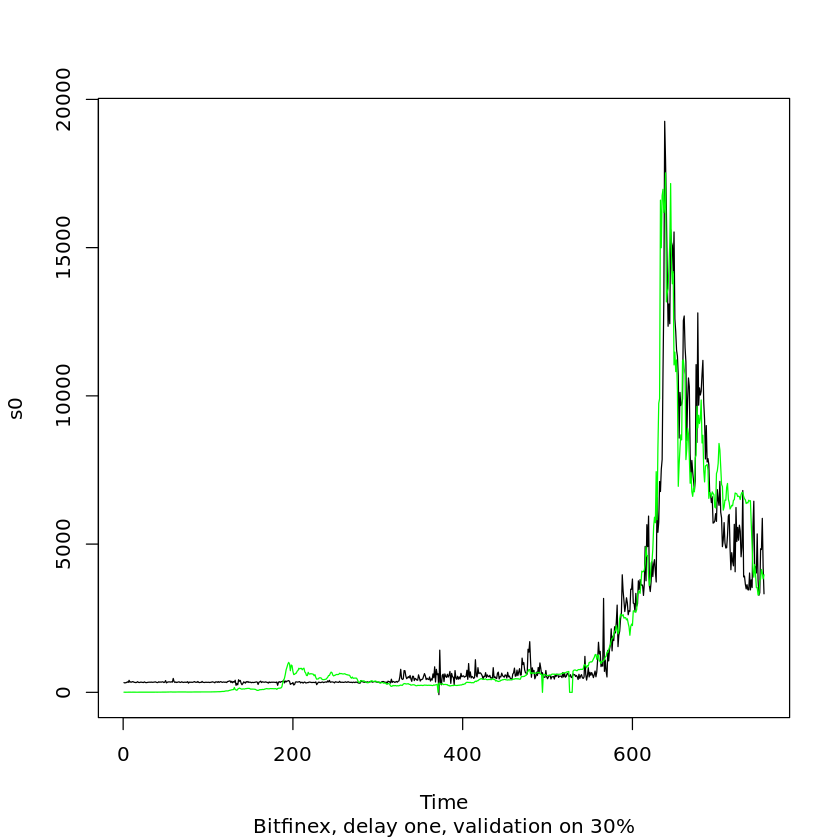

In [14]:
predict_model(lasso_model(head(x,-1), tail(y,-1)),head(x.test, -1), tail(test.data, -1), 'Bitfinex, delay one, validation on 30%')

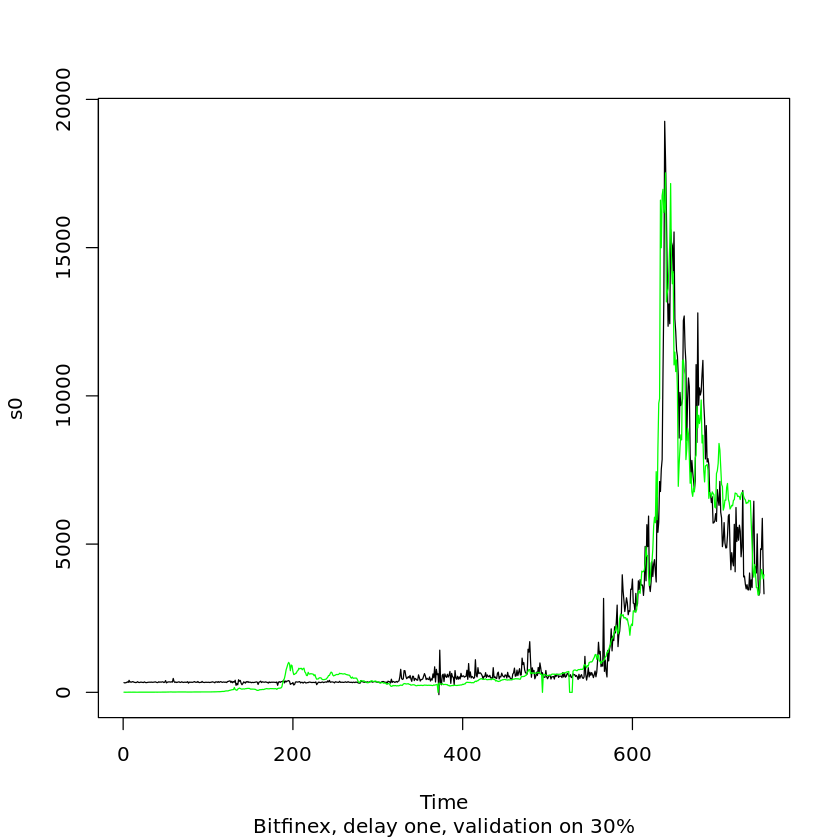

In [15]:
predict_model(lasso_model(head(x,-1), tail(y,-1)),head(x.test, -1), tail(test.data, -1), 'Bitfinex, delay one, validation on 30%')

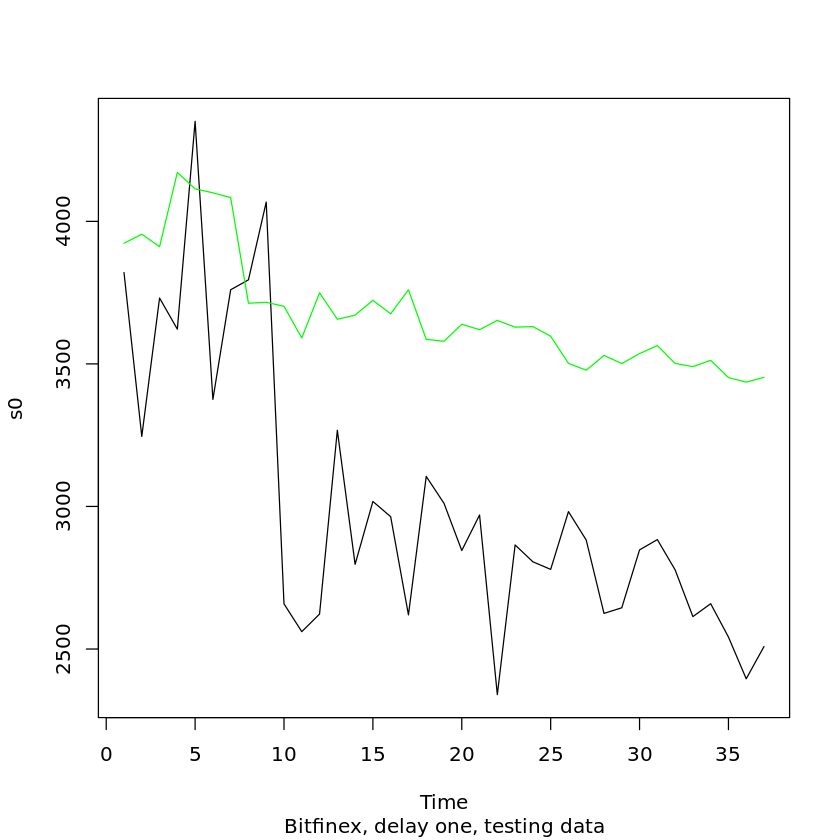

In [16]:
predict_model(lasso_model(head(x,-1), tail(y,-1)),head(test_last_20, -1), tail(bitfinex_data_test[1], -1), 'Bitfinex, delay one, testing data')

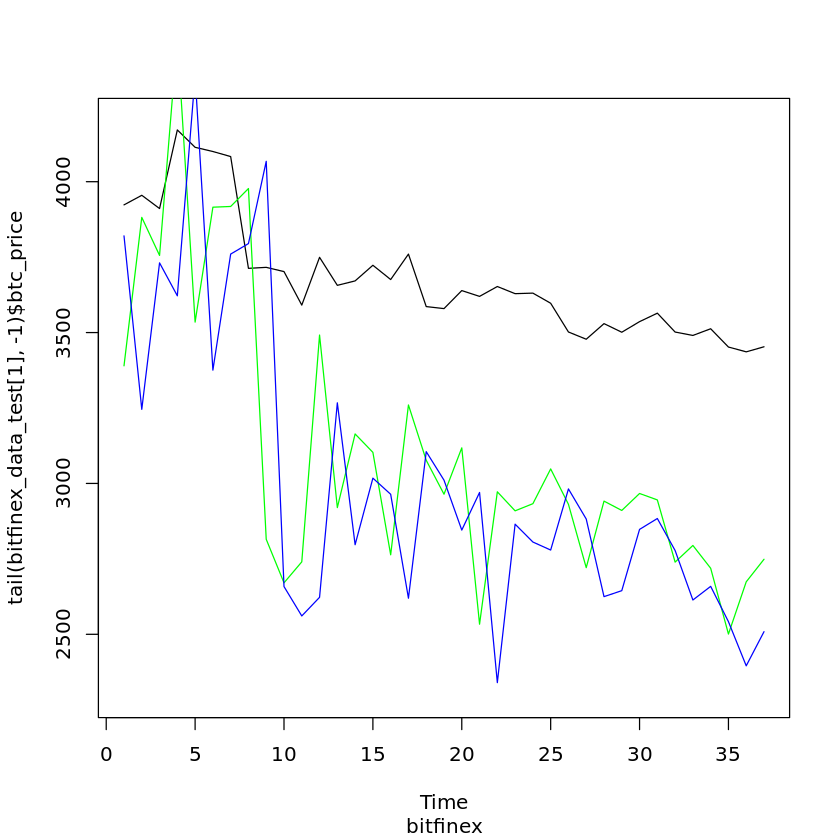

In [17]:
a  = predict(lasso_model(x, y), newx = test_last_20)
b  = predict(lasso_model(head(x,-1), tail(y,-1)), newx = head(test_last_20, -1))
plot.ts(tail(bitfinex_data_test[1], -1)$btc_price, sub = 'bitfinex', ylim=c(2300,4200))
lines(tail(a, -1),col="green")
lines(b,col="blue")

btc change

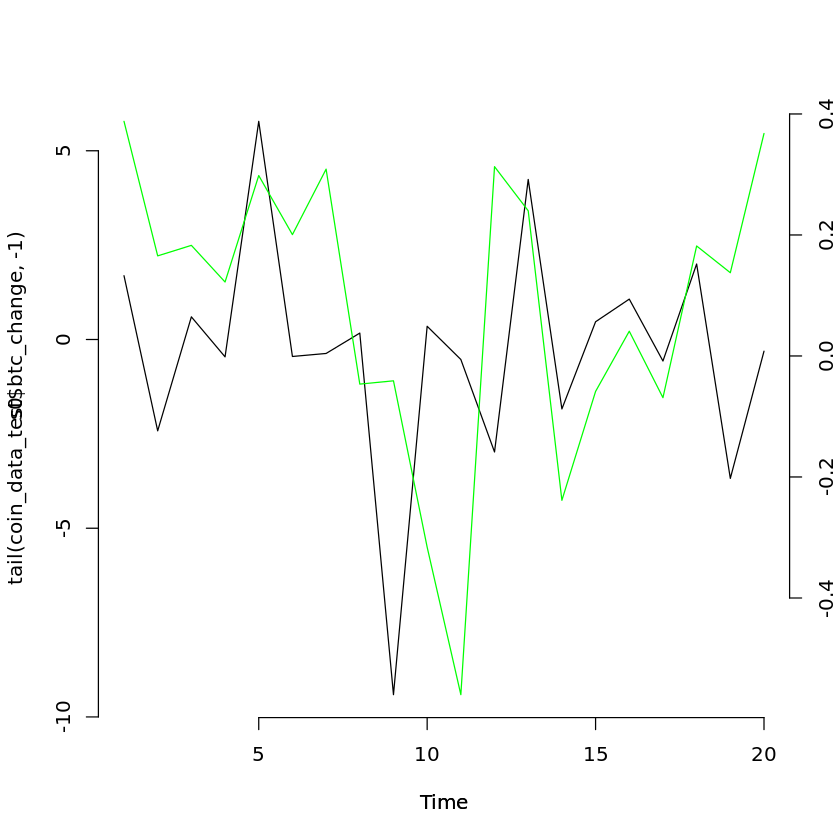

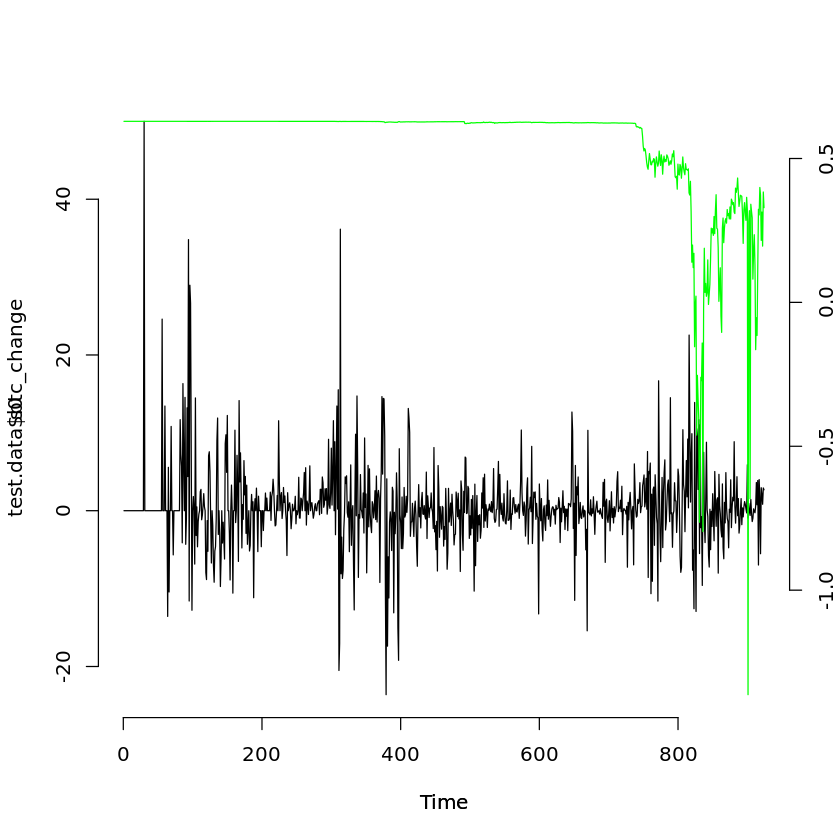

In [18]:
coin_data <- read.csv("../imp_coin.csv")[-c(1,2,4,5)]
coin_data_test <-read.csv("../imp_coin_test.csv")[-c(1,2,4,5)]
set.seed(101)
training.samples <- createDataPartition(coin_data$btc_change, p = 0.7, list = FALSE)
train.data  <- coin_data[training.samples, ]
test.data <- coin_data[-training.samples, ]
# day by day model on 70% data trained
x <- model.matrix(btc_change~., train.data)[,-1]
y <- as.double(train.data$btc_change)
x.test <- model.matrix(btc_change ~., test.data)[,-1]

test_last_20 <- model.matrix(btc_change ~., coin_data_test)[,-1]

a  = predict(lasso_model(head(x,-1), tail(y,-1)), newx = head(test_last_20, -1))
plot.ts(tail(coin_data_test$btc_change, -1), axes=FALSE)
axis(1)
axis(2)
par(new=TRUE)
plot.ts(a, col='green', axes=FALSE)
axis(4)

# predict on the 30% of the data delay one day
a = predict(lasso_model(head(x,-1), tail(y,-1)),newx = head(x.test, -1))
plot.ts(test.data$btc_change, axes=FALSE)
axis(1)
axis(2)
par(new=TRUE)
plot.ts(a, col='green', axes=FALSE)
axis(4)